In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import numpy as np

<H3>Funkcje, których można użyć przy AdaBoostClassifier - wspierają ważenie próbek </H3>

In [2]:
import inspect
from sklearn.utils.testing import all_estimators
for name, clf in all_estimators(type_filter='classifier'):
    try:
        if 'sample_weight' in inspect.getfullargspec(clf().fit)[0]:
            print(name)
    except TypeError:
        pass

C:\Users\iperenc\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\iperenc\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


AdaBoostClassifier
BaggingClassifier
BernoulliNB
CalibratedClassifierCV
ComplementNB
DecisionTreeClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianNB
GradientBoostingClassifier
LinearSVC
LogisticRegression
LogisticRegressionCV
MultinomialNB
NuSVC
Perceptron
RandomForestClassifier
RidgeClassifier
RidgeClassifierCV
SGDClassifier
SVC


<H3>Generowanie i podział zbioru do klasyfikacji</H3>

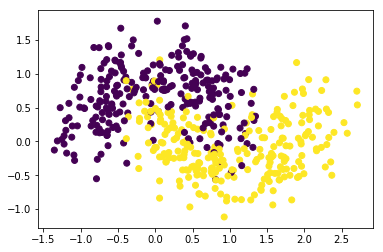

In [3]:
X, y = datasets.make_moons(n_samples=500, shuffle=True, noise=0.3, random_state=None)
#X, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2, class_sep = 1, n_samples =500) 
plt.scatter(X[:, 0], X[:, 1], c=y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<H3>Klasyfikator AdaBoost</H3>
Klasyfikator bazowy (domyślny): DecisionTreeClassifier

In [5]:
abc = AdaBoostClassifier(n_estimators=50)#,  learning_rate=0.125)

model = abc.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [6]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)

Accuracy: 0.81


array([[41,  7],
       [12, 40]], dtype=int64)

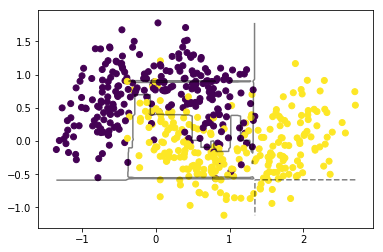

In [7]:
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = abc.decision_function(xy).reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.scatter(X[:, 0], X[:, 1], c=y)

___

<H3>Klasyfikator AdaBoost</H3>
Klasyfikator bazowy: SupportVectorClassifier

In [8]:
svc=SVC(probability=True, kernel='rbf', gamma='auto')

abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc, learning_rate=0.125)

model = abc.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)

Accuracy: 0.91


array([[45,  3],
       [ 6, 46]], dtype=int64)

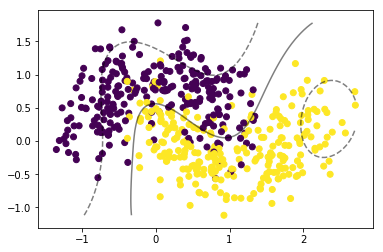

In [10]:
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = abc.decision_function(xy).reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.scatter(X[:, 0], X[:, 1], c=y)